<a href="https://colab.research.google.com/github/koDELLL/MachineLearning/blob/main/koDELL/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


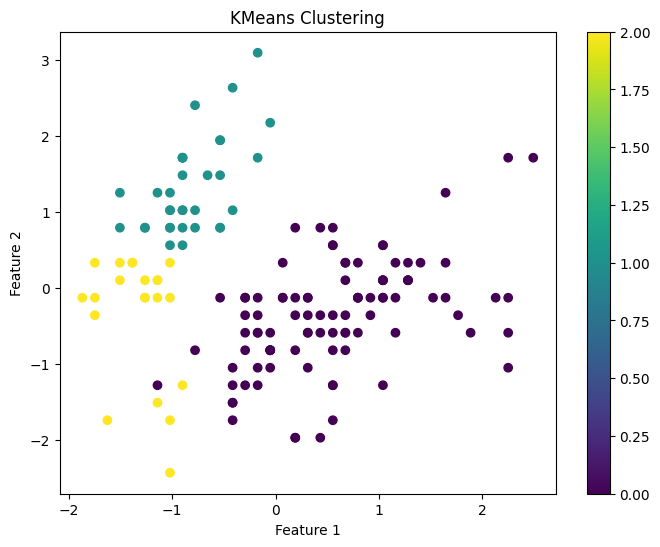

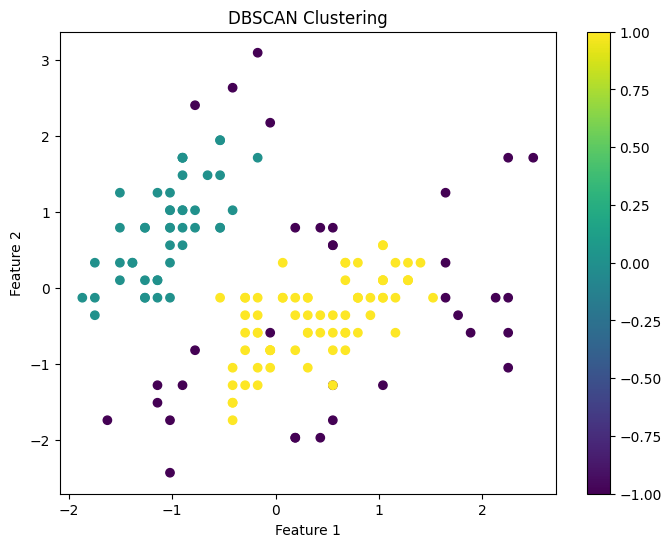

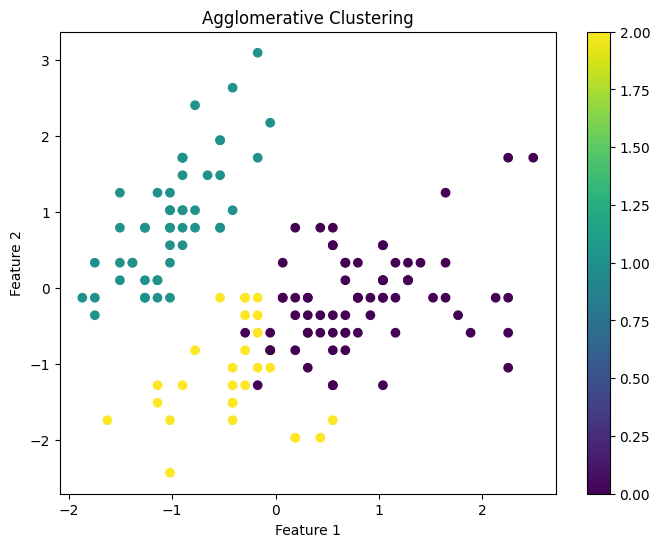

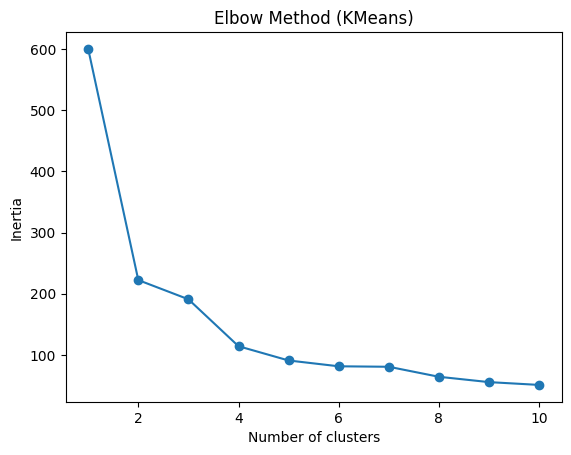

Silhouette Score KMeans: 0.4798814508199817
Silhouette Score DBSCAN: 0.3565164814270073
Silhouette Score Agglomerative Clustering: 0.4466890410285909
ARI KMeans: 0.432804702527474
ARI DBSCAN: 0.4420986685885924
ARI Agglomerative Clustering: 0.6153229932145449
V-Measure KMeans: 0.5895674488004072
V-Measure DBSCAN: 0.5114298559522715
V-Measure Agglomerative Clustering: 0.6754701853436885
                    KMeans    DBSCAN  Agglomerative Clustering
Silhouette Score  0.479881  0.356516                  0.446689
ARI               0.432805  0.442099                  0.615323
V-Measure         0.589567  0.511430                  0.675470
Model terbaik berdasarkan evaluasi: V-Measure


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Memanggil Dataset
# Gantilah dengan path file CSV yang sesuai atau gunakan dataset dari sklearn
# Dataset Iris dari sklearn (gunakan ini jika dataset file CSV belum ada)
data = load_iris()

# Jika menggunakan dataset CSV, gunakan kode berikut:
# file_path = 'data.csv'
# data = pd.read_csv(file_path)
# X = data.drop(columns='target')
# y_true = data['target']

# Menyimpan data dan target
X = data.data
y_true = data.target

# 2. Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Membuat dan Melatih Model Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agg_clust = AgglomerativeClustering(n_clusters=3)

kmeans_labels = kmeans.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)
agg_clust_labels = agg_clust.fit_predict(X_scaled)

# 4. Visualisasi Clustering
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

plot_clusters(X_scaled, kmeans_labels, 'KMeans Clustering')
plot_clusters(X_scaled, dbscan_labels, 'DBSCAN Clustering')
plot_clusters(X_scaled, agg_clust_labels, 'Agglomerative Clustering')

# 5. Elbow Method untuk KMeans
def elbow_method(X_scaled):
    inertia = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
    plt.plot(K_range, inertia, marker='o')
    plt.title('Elbow Method (KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

elbow_method(X_scaled)

# 6. Menghitung Silhouette Score untuk setiap model
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
silhouette_agg = silhouette_score(X_scaled, agg_clust_labels)

print(f"Silhouette Score KMeans: {silhouette_kmeans}")
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score Agglomerative Clustering: {silhouette_agg}")

# 7. Evaluasi dengan ARI dan V-Measure
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)
ari_agg = adjusted_rand_score(y_true, agg_clust_labels)

v_measure_kmeans = v_measure_score(y_true, kmeans_labels)
v_measure_dbscan = v_measure_score(y_true, dbscan_labels)
v_measure_agg = v_measure_score(y_true, agg_clust_labels)

print(f"ARI KMeans: {ari_kmeans}")
print(f"ARI DBSCAN: {ari_dbscan}")
print(f"ARI Agglomerative Clustering: {ari_agg}")

print(f"V-Measure KMeans: {v_measure_kmeans}")
print(f"V-Measure DBSCAN: {v_measure_dbscan}")
print(f"V-Measure Agglomerative Clustering: {v_measure_agg}")

# 8. Membandingkan hasil evaluasi untuk memilih model terbaik
scores = {
    'KMeans': {
        'Silhouette Score': silhouette_kmeans,
        'ARI': ari_kmeans,
        'V-Measure': v_measure_kmeans
    },
    'DBSCAN': {
        'Silhouette Score': silhouette_dbscan,
        'ARI': ari_dbscan,
        'V-Measure': v_measure_dbscan
    },
    'Agglomerative Clustering': {
        'Silhouette Score': silhouette_agg,
        'ARI': ari_agg,
        'V-Measure': v_measure_agg
    }
}

# Menampilkan hasil evaluasi untuk setiap model
df_scores = pd.DataFrame(scores)
print(df_scores)

# Memilih model terbaik berdasarkan rata-rata dari metrik evaluasi
best_model = df_scores.mean(axis=1).idxmax()
print(f"Model terbaik berdasarkan evaluasi: {best_model}")
